In [1]:
# import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# import the demographic data
demographic_data = pd.read_csv('funcs/tsv/master_participants_list_0to11.tsv', sep='\t')
# Map the sex column to a categorical variable
demographic_data['sex'] = demographic_data['sex'].map({'M': 'Male', 'F': 'Female'})

/var/folders/yh/v431j0015bq2_32ydhg5kvnm0000gn/T/ipykernel_23945/2290588986.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  availability_summary = demographic_data.groupby('release_number').apply(lambda df: df.loc[:, task_columns].apply(pd.Series.value_counts).T.fillna(0))


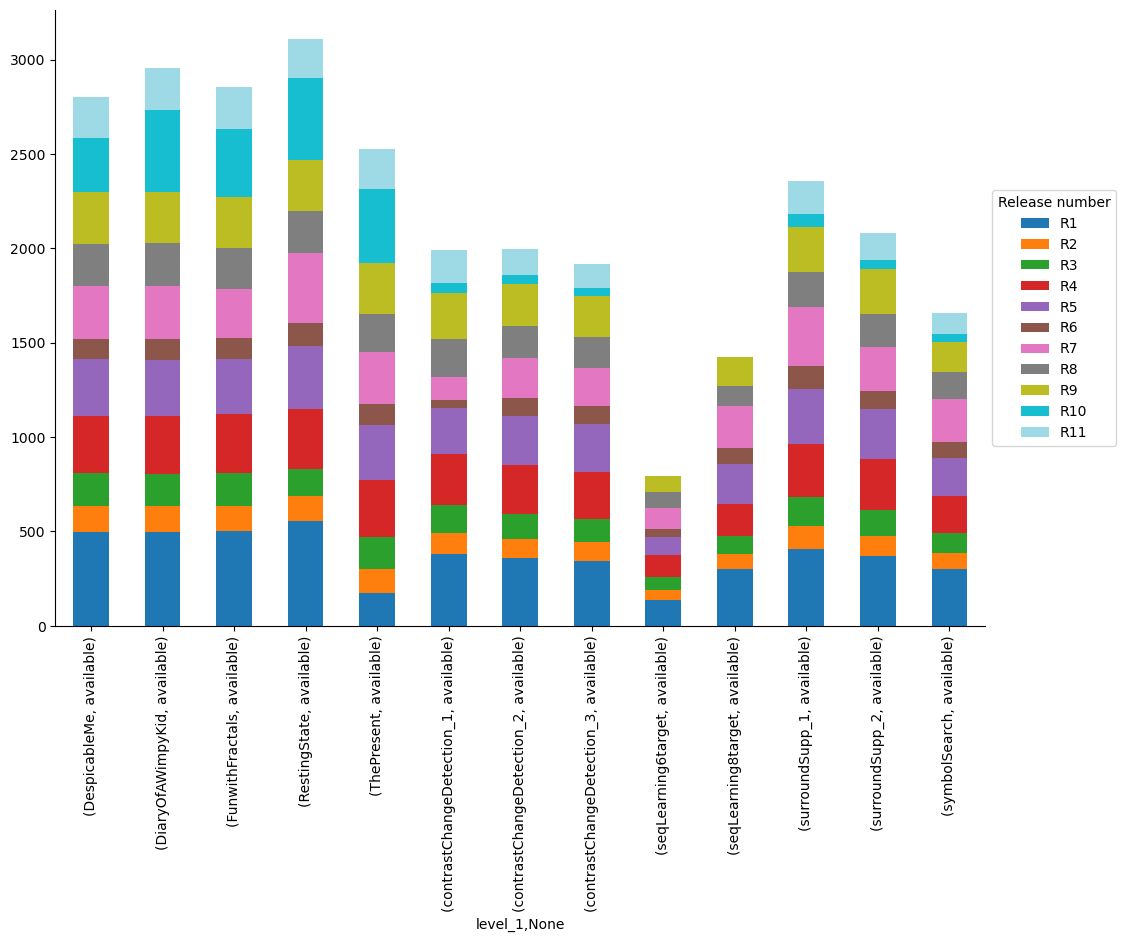

In [ ]:
# make stacked bar plot of the tasks marked as available
# tasks are listed in the columns 11 to last column of the demographic data
excluded_columns = ['participant_id', 'release_number', 'sex', 'age', 'ehq_total', 'commercial_use', 'full_pheno', 'p_factor', 'attention', 'internalizing', 'externalizing']
task_columns = [col for col in demographic_data.columns if col not in excluded_columns]

# Count the availability status for each task across releases
availability_summary = demographic_data.groupby('release_number').apply(lambda df: df.loc[:, task_columns].apply(pd.Series.value_counts).T.fillna(0))

# Reset index for better visualization
availability_summary = availability_summary.reset_index()

# Melt, so X axis becomes tasks and Y axis becomes counts, with different colors for each release
plot_data = availability_summary.set_index(['release_number', 'level_1']).stack().unstack(level=0)

# add categorical index to make the plot order from R1, R2 to R11
plot_data.columns = pd.CategoricalIndex(plot_data.columns.values, categories=[f'R{i}' for i in range(1, 12)], ordered=True)
plot_data = plot_data.sort_index(axis=1)
# Plot the stacked bar plot only for the tasks that are available
# plot only the tasks that are available, mentioned in the index
plot_data = plot_data.loc[plot_data.index.get_level_values(level=1) == 'available', :]
fig, ax = plt.subplots(figsize=(12, 8))
plot_data.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
# remove the right and top spines
sns.despine()
# set th legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Release number')
plt.show()

# save the plot
# plt.savefig('funcs/availability_summary.pdf', bbox_inches='tight')

In [10]:
# Calculate the total number of participants per release
total_participants = demographic_data.groupby('release_number').size()

# Calculate the number of participants with at least one task marked as available
participants_with_available_task = demographic_data[task_columns].apply(lambda row: (row == 'available').any(), axis=1)
participants_with_available_task_count = demographic_data[participants_with_available_task].groupby('release_number').size()

# Create the summary table
summary_table = pd.DataFrame({
    'Total Participants': total_participants,
    'Participants with Available Task': participants_with_available_task_count
}).reset_index()

# add total as the last row only for the last two columns
summary_table.loc['Total'] = summary_table.iloc[:, 1:].sum()

print(summary_table)

      release_number  Total Participants  Participants with Available Task
0                 R1               578.0                             578.0
1                R10               533.0                             490.0
2                R11               430.0                             240.0
3                 R2               154.0                             152.0
4                 R3               185.0                             183.0
5                 R4               324.0                             324.0
6                 R5               330.0                             330.0
7                 R6               135.0                             134.0
8                 R7               381.0                             381.0
9                 R8               257.0                             257.0
10                R9               295.0                             295.0
Total            NaN              3602.0                            3364.0


<Figure size 640x480 with 0 Axes>

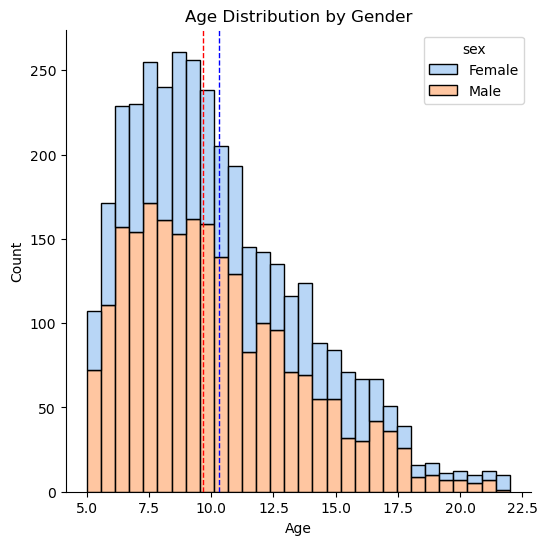

In [ ]:
# Create a histogram with 'age' on the x-axis and 'sex' as hue
plt.figure(figsize=(6, 6))
sns.histplot(data=demographic_data, x='age', hue='sex', multiple='stack',bins=30, palette='pastel')
# plot mean and median age
plt.axvline(demographic_data['age'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(demographic_data['age'].median(), color='red', linestyle='dashed', linewidth=1)

plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
sns.despine()
# save the plot as pdf
# plt.savefig('funcs/age_distribution.pdf')
plt.show()

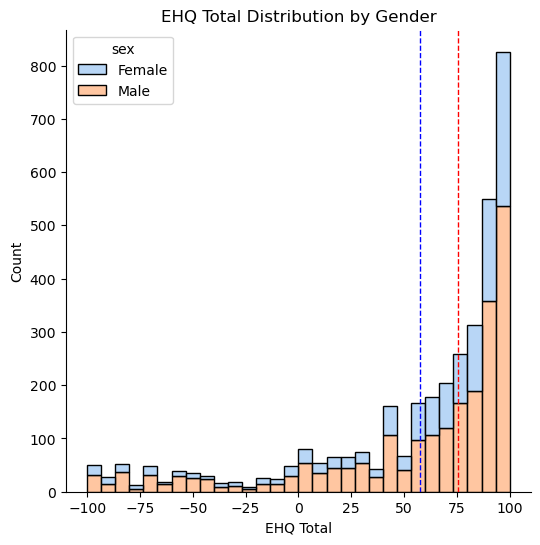

In [ ]:
# Add histogram for ehq_total with gender as hue
plt.figure(figsize=(6, 6))
sns.histplot(data=demographic_data, x='ehq_total', hue='sex', multiple='stack',bins=30, palette='pastel')
# plot mean and median ehq_total
plt.axvline(demographic_data['ehq_total'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(demographic_data['ehq_total'].median(), color='red', linestyle='dashed', linewidth=1)

plt.title('EHQ Total Distribution by Gender')
plt.xlabel('EHQ Total')
plt.ylabel('Count')
sns.despine()
# save the plot as pdf
# plt.savefig('funcs/ehq_total_distribution.pdf')
plt.show()

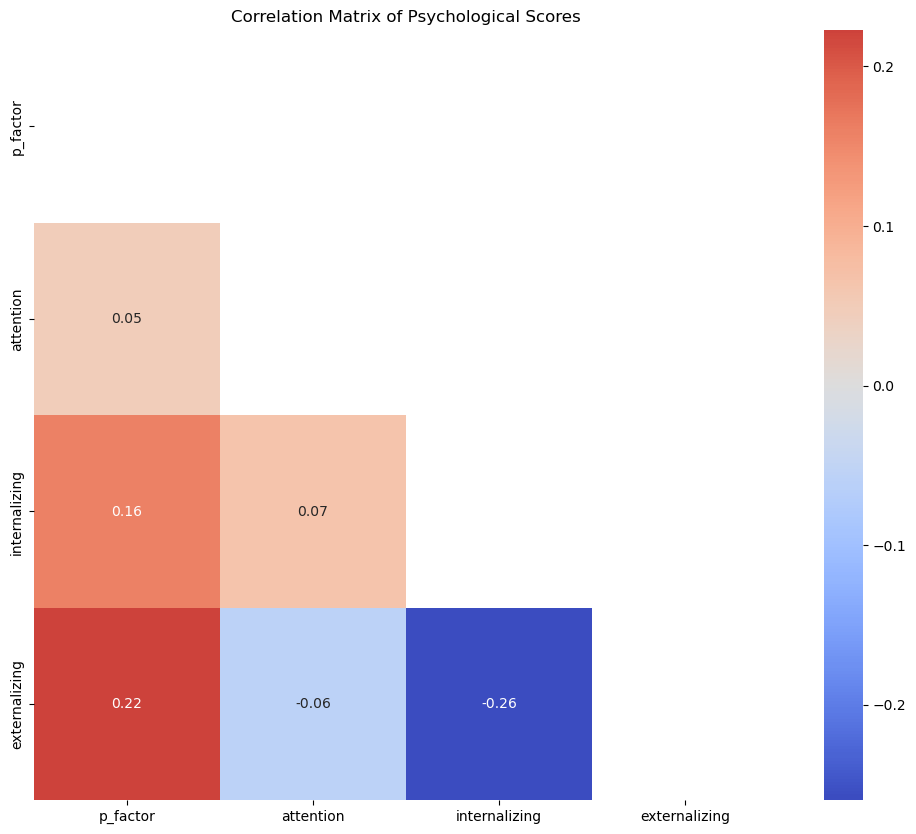

In [ ]:
# Select relevant columns
selected_data = demographic_data[['p_factor', 'attention', 'internalizing', 'externalizing']]

# Compute the correlation matrix
corr_matrix = selected_data.corr()

# Create a mask to hide the upper triangle and diagonal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap
plt.figure(figsize=(12, 10))  # Increase figure size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, annot_kws={"size": 10}, mask=mask)
plt.title('Correlation Matrix of Psychological Scores')
# save the plot as pdf
# plt.savefig('funcs/correlation_matrix.pdf')
plt.show()


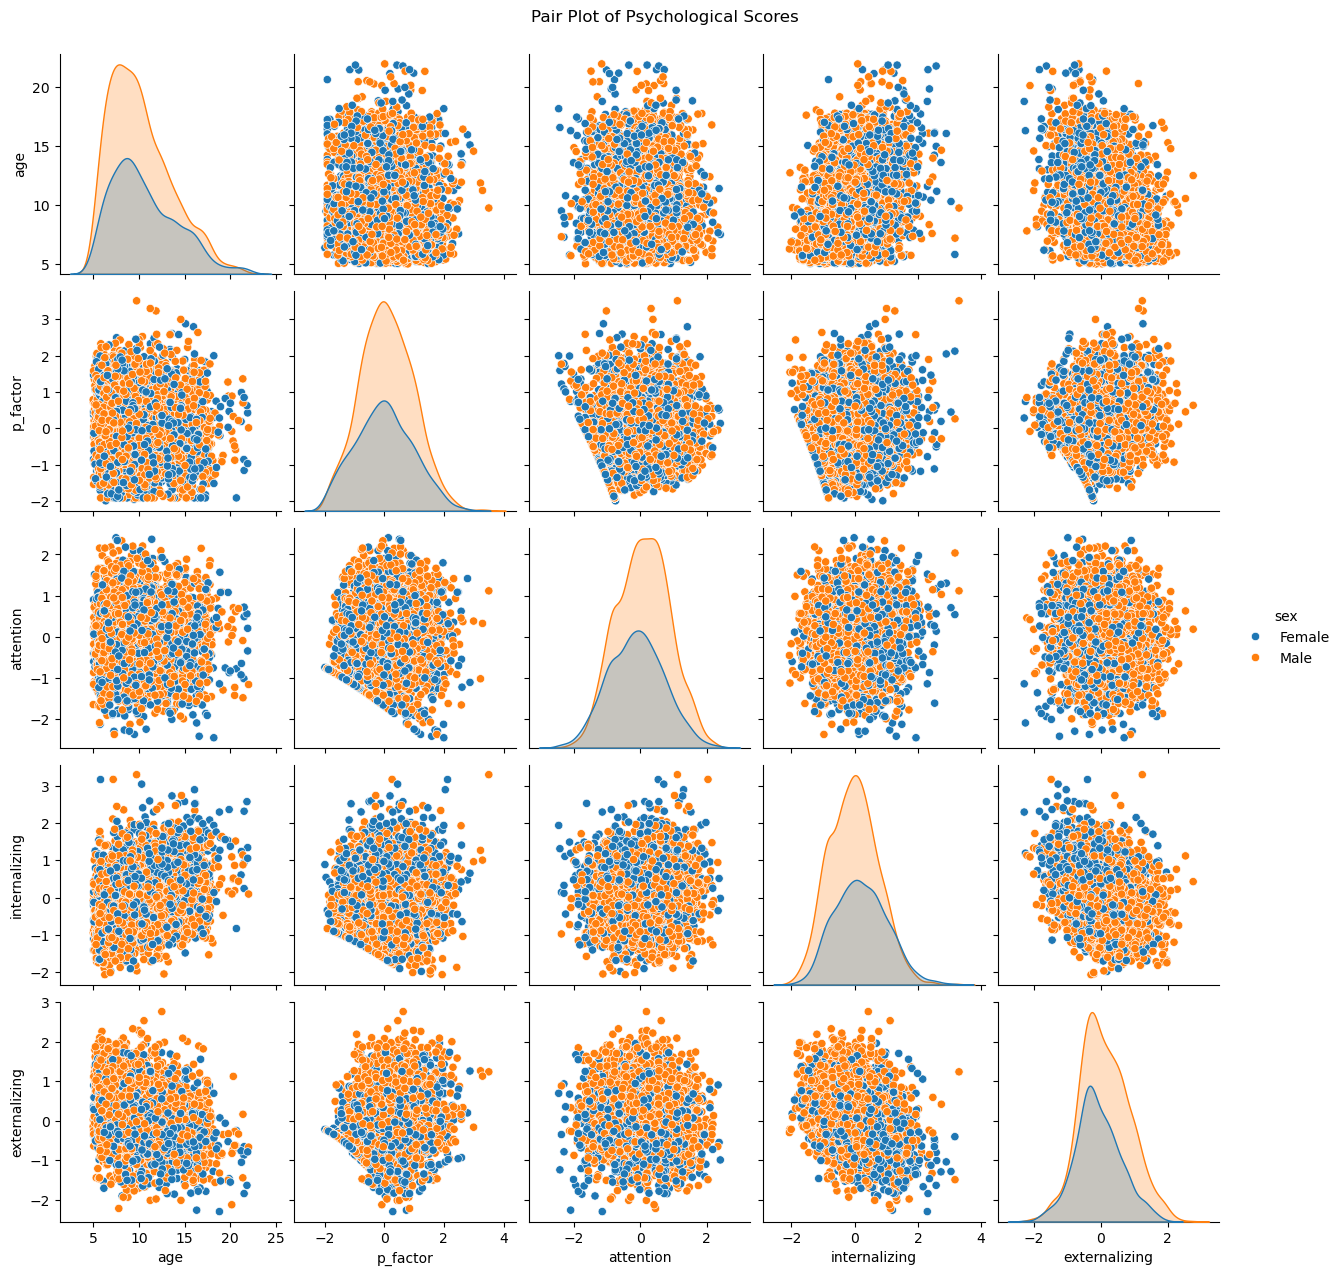

In [ ]:
sns.pairplot(demographic_data, vars=['age', 'p_factor', 'attention', 'internalizing', 'externalizing'], hue='sex', diag_kind='kde')
plt.suptitle('Pair Plot of Psychological Scores', y=1.02)
# save the plot as pdf
# plt.savefig('funcs/pair_plot.pdf')
plt.show()